In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ps = pd.read_excel("C:\\Users\\kanis\\Documents\\New folder\\Forecasting\\CocaCola_Sales_Rawdata.xlsx")
ps.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


<AxesSubplot:>

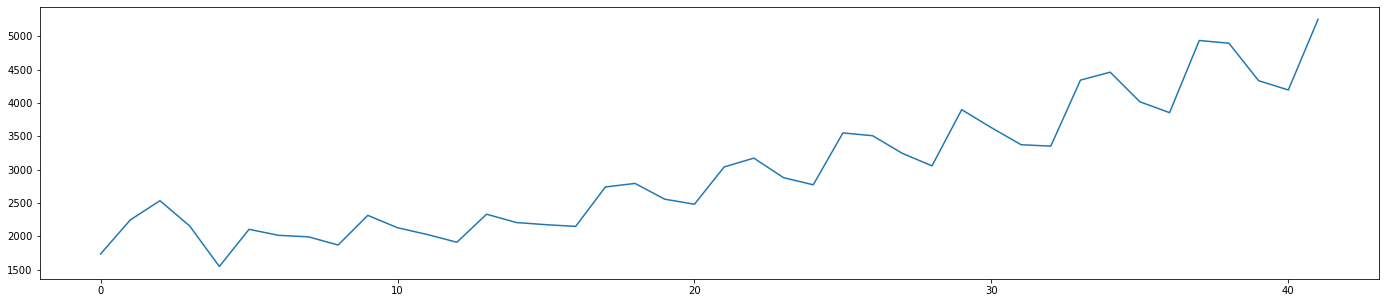

In [3]:
plt.figure(figsize=(24,5))
ps.Sales.plot()

In [12]:
quarter=['Q1','Q2','Q3','Q4']
n=ps['Quarter'][0]
n[0:2]

ps['quarter']=0

for i in range(42):
    n=ps['Quarter'][i]
    ps['quarter'][i]=n[0:2]
    
dummy=pd.DataFrame(pd.get_dummies(ps['quarter']))

ps1=pd.concat((ps,dummy),axis=1)
t= np.arange(1,43)
ps1['t']=t
ps1['t_square']=ps1['t']*ps1['t']

log_Sales=np.log(ps1['Sales'])
ps1['log_Sales']=log_Sales

<ipython-input-12-3fab8ab9062e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ps['quarter'][i]=n[0:2]


In [21]:
ps1.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


<AxesSubplot:xlabel='quarter', ylabel='Sales'>

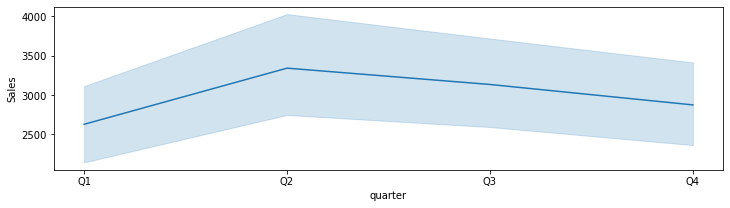

In [14]:
plt.figure(figsize=(12,3))
sns.lineplot(x="quarter",y="Sales",data=ps)

##Splitting data

In [15]:
Train = ps1.head(34)
Test = ps1.iloc[34:38,:]
predict_data = ps1.tail(4)

In [16]:
ps2= ps1.iloc[0:38,:]

In [18]:
predict_data

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
38,Q3_95,4895.0,Q3,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,Q1,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,Q2,0,1,0,0,42,1764,8.566555


In [19]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

669.4685590402652

In [20]:
#Exponential

Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

564.5012993862665

In [22]:
#Quadratic 

Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

394.6747277541498

In [23]:
#Additive seasonality 

add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1686.7389646362878

In [24]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

174.8861004712906

In [25]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1757.7740414202278

In [26]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

404.5642262159638

In [27]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,174.886100
2,rmse_Quad,394.674728
6,rmse_Mult_add_sea,404.564226
1,rmse_Exp,564.501299
0,rmse_linear,669.468559
3,rmse_add_sea,1686.738965
5,rmse_Mult_sea,1757.774041


In [28]:
predict_data

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
38,Q3_95,4895.0,Q3,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,Q1,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,Q2,0,1,0,0,42,1764,8.566555


In [30]:
#Build the model on entire data set
model_full = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=ps2).fit()

In [31]:
pred_new  = pd.Series(add_sea_Quad.predict(predict_data))
pred_new

38    4839.220330
39    4731.881928
40    4668.345851
41    5399.952382
dtype: float64

In [32]:
predict_data["forecasted_Sales"] = pd.DataFrame(pred_new)

<ipython-input-32-33d50a554571>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data["forecasted_Sales"] = pd.DataFrame(pred_new)


In [33]:
predict_data

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales,forecasted_Sales
38,Q3_95,4895.0,Q3,0,0,1,0,39,1521,8.495970,4839.220330
39,Q4_95,4333.0,Q4,0,0,0,1,40,1600,8.374015,4731.881928
40,Q1_96,4194.0,Q1,1,0,0,0,41,1681,8.341410,4668.345851
41,Q2_96,5253.0,Q2,0,1,0,0,42,1764,8.566555,5399.952382
